# Uncovering Clinical Insights into Heart Disease Risk
# Exploratory Data Analysis of heart disease data from Cleveland and Hungary
## 1. Import Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

## 2. Data Loading and Cleaning

In [24]:
columns = [
    'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
    'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina', 'st_depression',
    'st_slope', 'num_major_vessels', 'thalassemia', 'target'
]

# Load datasets
cleveland = pd.read_csv(r"C:\Users\MAMATHA\Downloads\heart+disease\processed.cleveland.csv", names=columns)
hungary = pd.read_csv(r"C:\Users\MAMATHA\Downloads\heart+disease\processed.hungarian.csv", names=columns)

# Add region identifiers
cleveland['region'] = 'Cleveland'
hungary['region'] = 'Hungary'

# Combine datasets
df = pd.concat([cleveland, hungary], ignore_index=True)

# Clean data
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    if col != 'region':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Binary target variable
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Handle missing values
df.dropna(subset=["resting_bp","rest_ecg","max_heart_rate","exercise_angina"],inplace=True)
df["cholesterol"] = df["cholesterol"].fillna(df["cholesterol"].median())
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].fillna(df['fasting_blood_sugar'].mode()[0])
df['st_slope'] = df['st_slope'].fillna(df['st_slope'].mode()[0])
df['num_major_vessels'] = df['num_major_vessels'].fillna(df['num_major_vessels'].median())
df['thalassemia'] = df['thalassemia'].fillna(df['thalassemia'].mode()[0])

# Create readable labels
df['sex_label'] = df['sex'].map({0: 'female', 1: 'male'})

## 3. Basic Dataset Overview

In [27]:
print("Dataset Info:\n")
print(df.info())

print("\nStatistical Summary:\n")
print(df.describe())

# Value counts for categorical columns
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                    'exercise_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
print("\nValue Counts for Categorical Features:\n")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 0 to 596
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  595 non-null    float64
 1   sex                  595 non-null    float64
 2   chest_pain_type      595 non-null    float64
 3   resting_bp           595 non-null    float64
 4   cholesterol          595 non-null    float64
 5   fasting_blood_sugar  595 non-null    float64
 6   rest_ecg             595 non-null    float64
 7   max_heart_rate       595 non-null    float64
 8   exercise_angina      595 non-null    float64
 9   st_depression        595 non-null    float64
 10  st_slope             595 non-null    float64
 11  num_major_vessels    595 non-null    float64
 12  thalassemia          595 non-null    float64
 13  target               595 non-null    int64  
 14  region               595 non-null    object 
 15  sex_label            595 non-n

## 4. Target Variable Analysis

Heart Disease Presence:

target
0    351
1    244
Name: count, dtype: int64


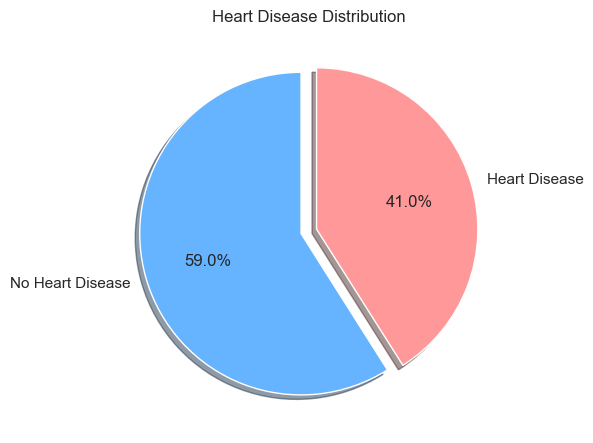


Patient Count by Region:

region
Cleveland    303
Hungary      292
Name: count, dtype: int64

Region vs Disease Presence:

target       0    1
region             
Cleveland  164  139
Hungary    187  105


In [31]:
# Count of disease presence
print("Heart Disease Presence:\n")
print(df['target'].value_counts())

# Pie chart for heart disease distribution
plt.figure(figsize=(6, 6))
labels = ['No Heart Disease', 'Heart Disease']
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

df['target'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=labels,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Breakdown by region
print("\nPatient Count by Region:\n")
print(df['region'].value_counts())

print("\nRegion vs Disease Presence:\n")
print(df.groupby(['region', 'target']).size().unstack())

## 5. Univariate Analysis


Continuous Feature Distributions:


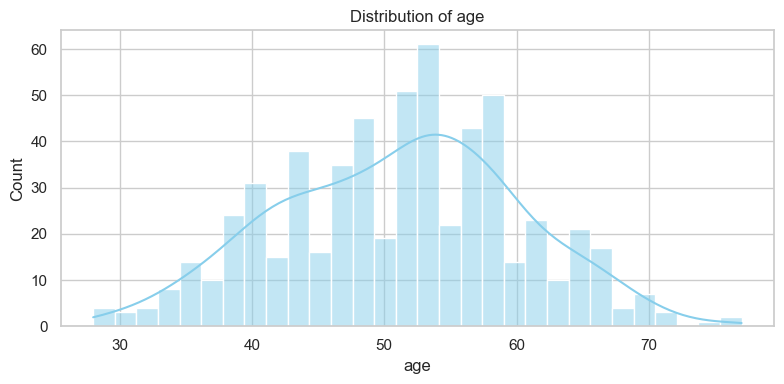

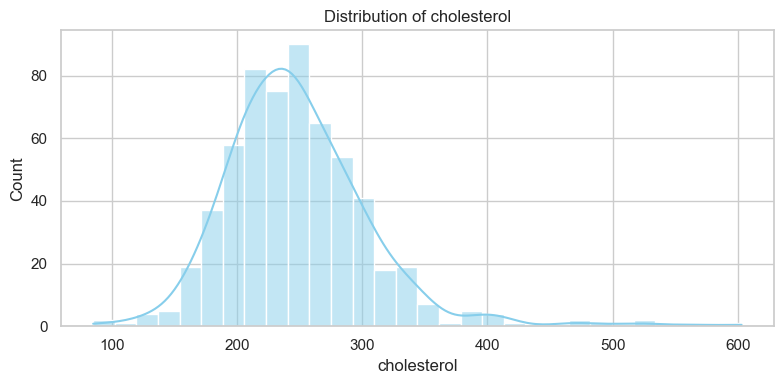

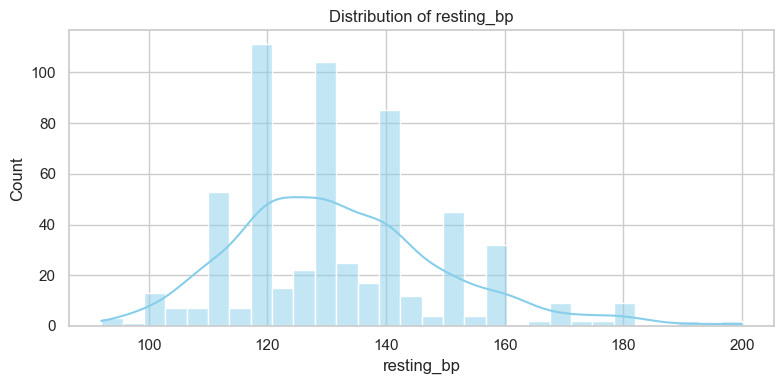

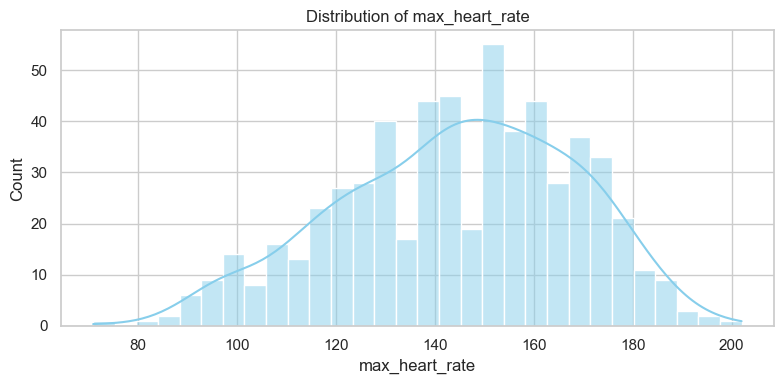

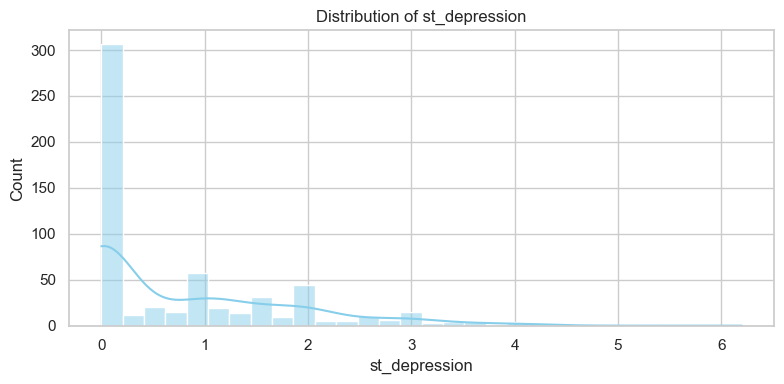


Categorical Feature Counts:


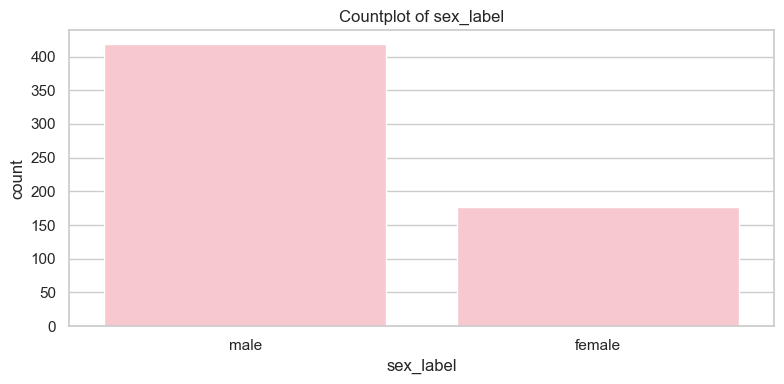

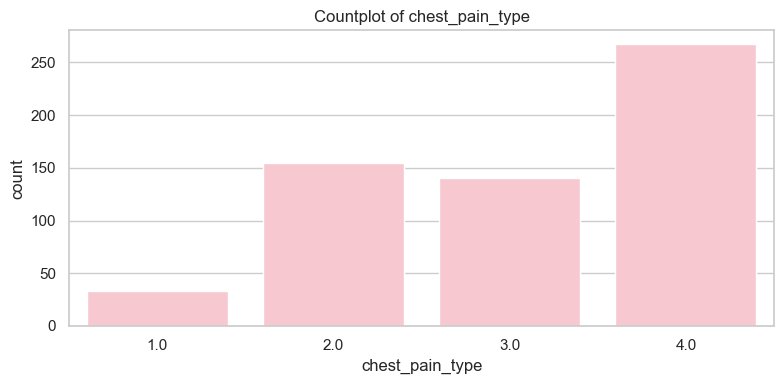

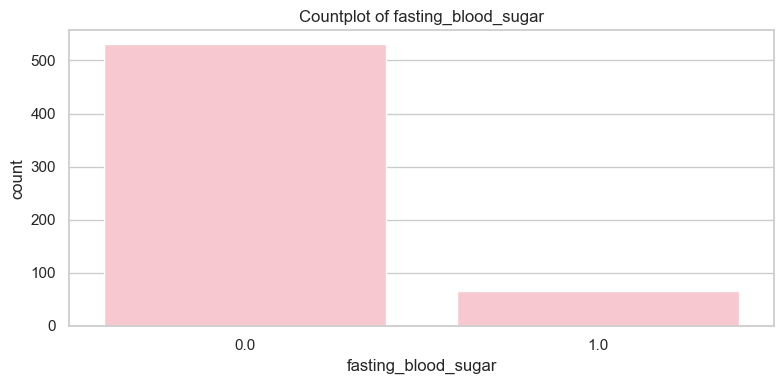

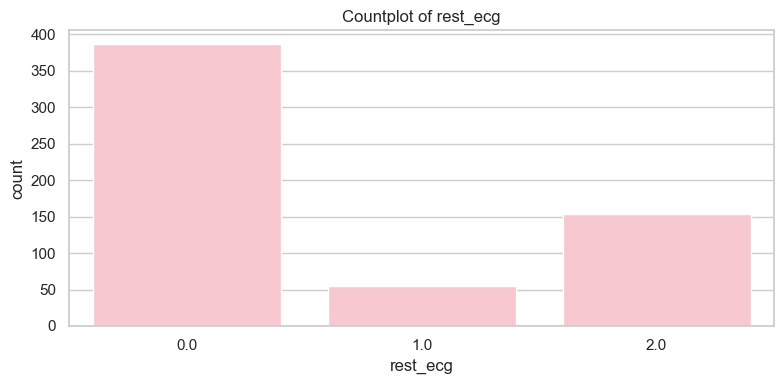

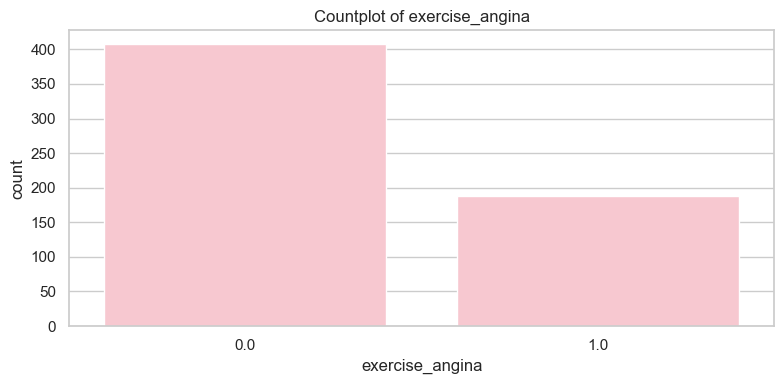

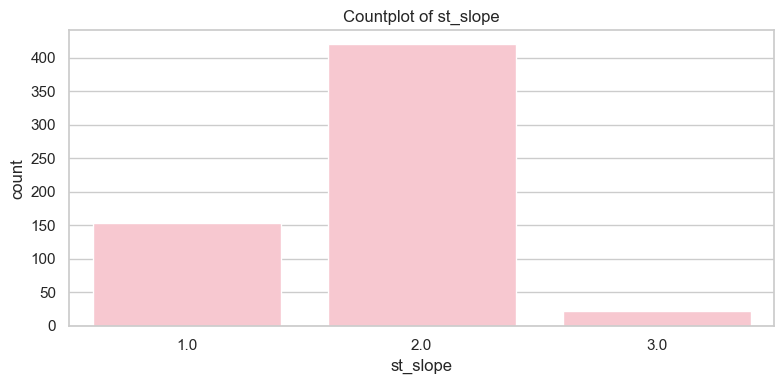

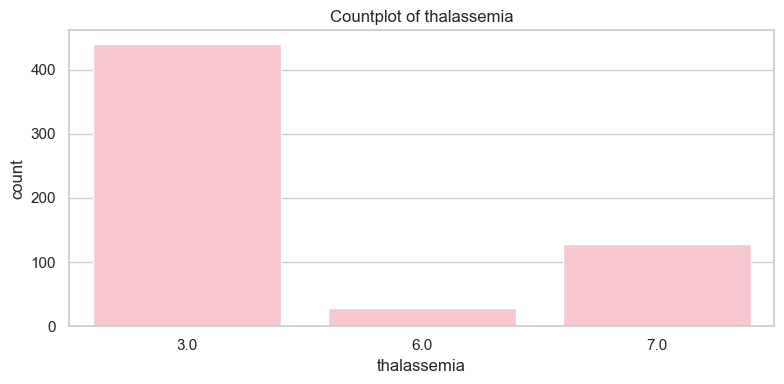

In [33]:
sns.set(style="whitegrid")

# Continuous features
continuous_features = ['age', 'cholesterol', 'resting_bp', 'max_heart_rate', 'st_depression']
print("\nContinuous Feature Distributions:")
for feature in continuous_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Categorical features
categorical_features = ['sex_label', 'chest_pain_type', 'fasting_blood_sugar', 
                       'rest_ecg', 'exercise_angina', 'st_slope', 'thalassemia']
print("\nCategorical Feature Counts:")
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, color="pink")
    plt.title(f'Countplot of {feature}')
    plt.tight_layout()
    plt.show()

## 6. Correlation Analysis

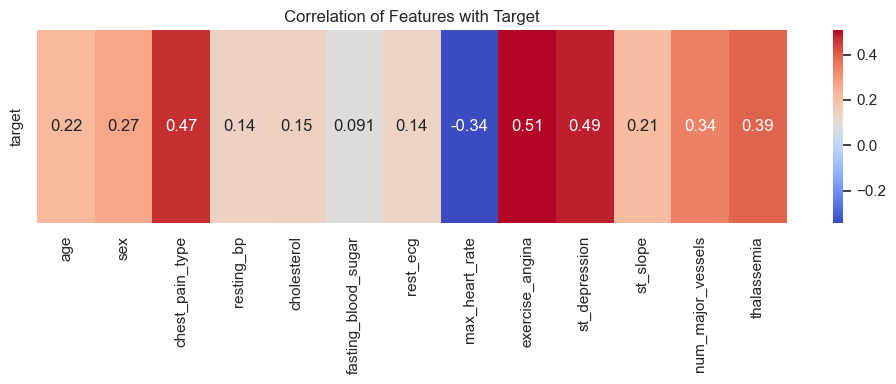

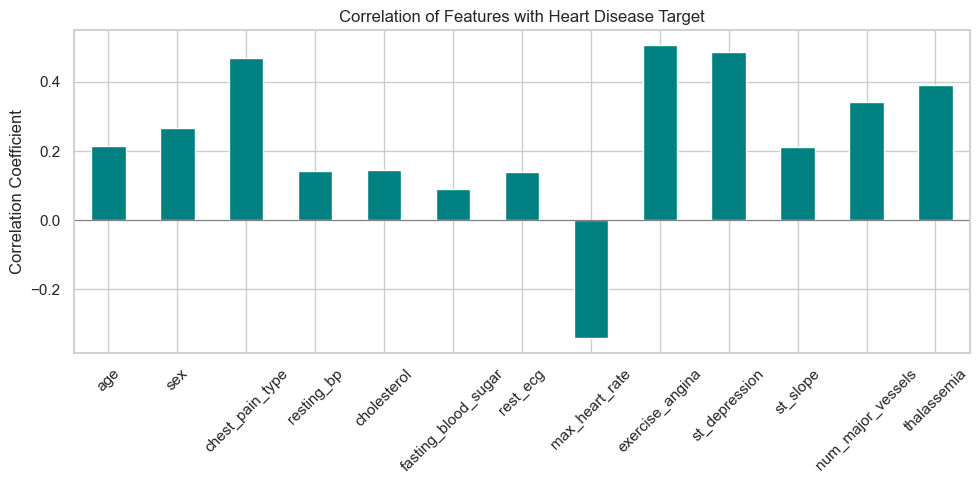

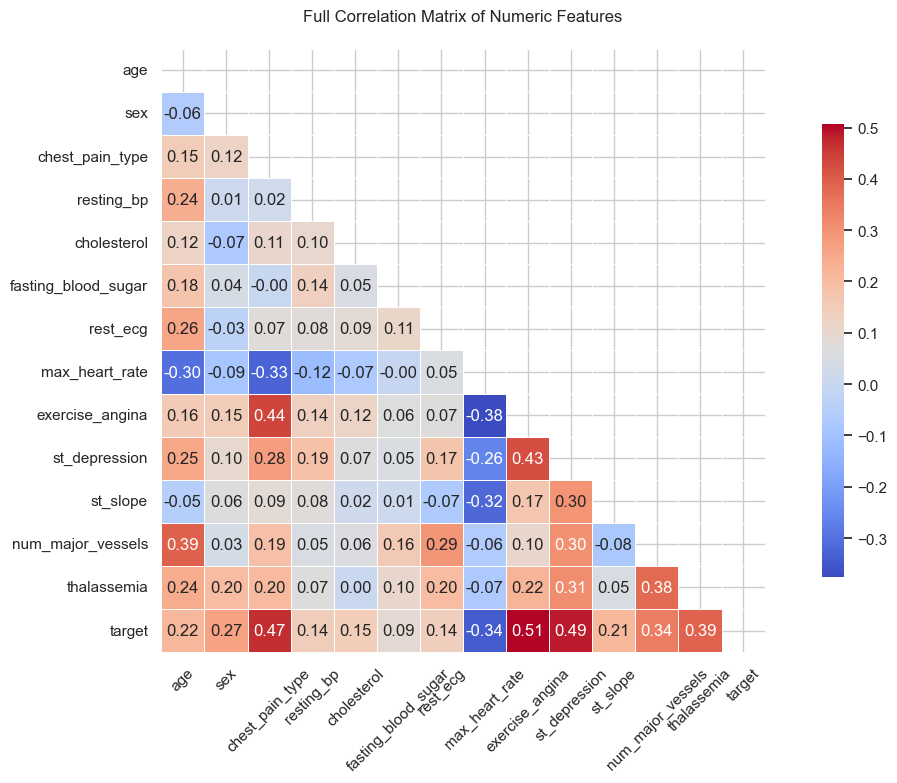

In [46]:
# Correlation with target
numeric_df = df.select_dtypes(include='number')
target_corr = numeric_df.corr()['target'].drop('target')

# Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(target_corr.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Target')
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(10, 5))
target_corr.plot(kind='bar', color='teal')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Correlation of Features with Heart Disease Target')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Full Correlation Matrix (Your Original Version)
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), 
           annot=True, 
           fmt='.2f', 
           cmap='coolwarm',
           linewidths=0.5, 
           square=True,
           cbar_kws={"shrink": 0.75},
           mask=np.triu(np.ones_like(df[numeric_cols].corr())))  # Added mask for cleaner view
plt.title('Full Correlation Matrix of Numeric Features', pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Bivariate Analysis


Feature Relationships with Target:


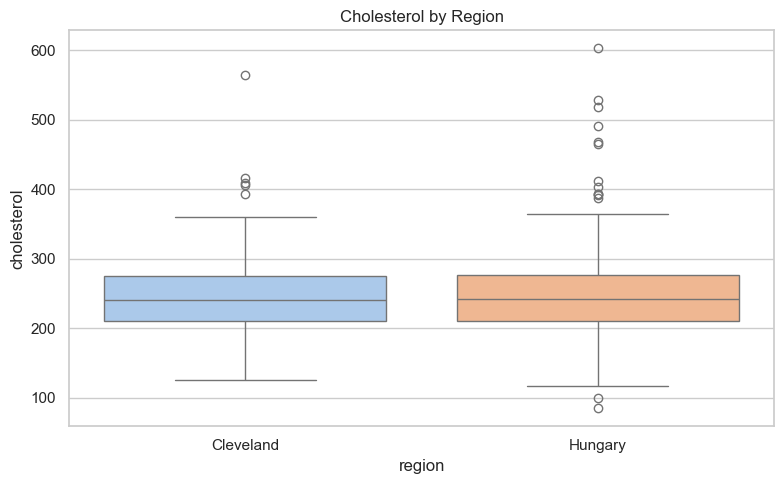

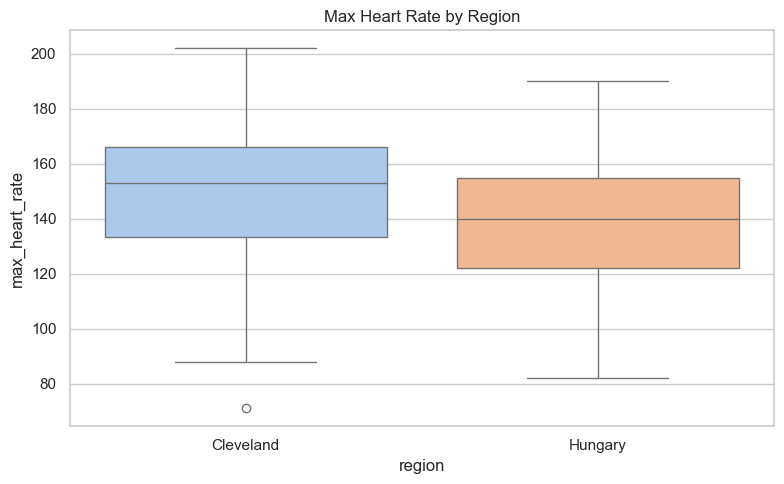

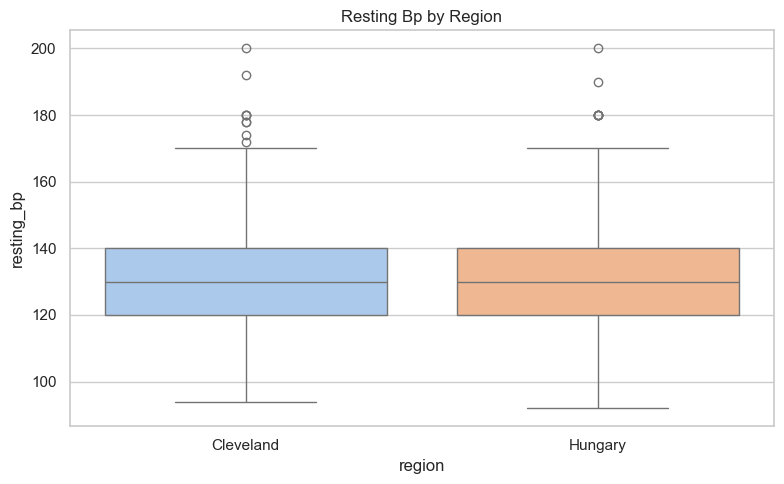

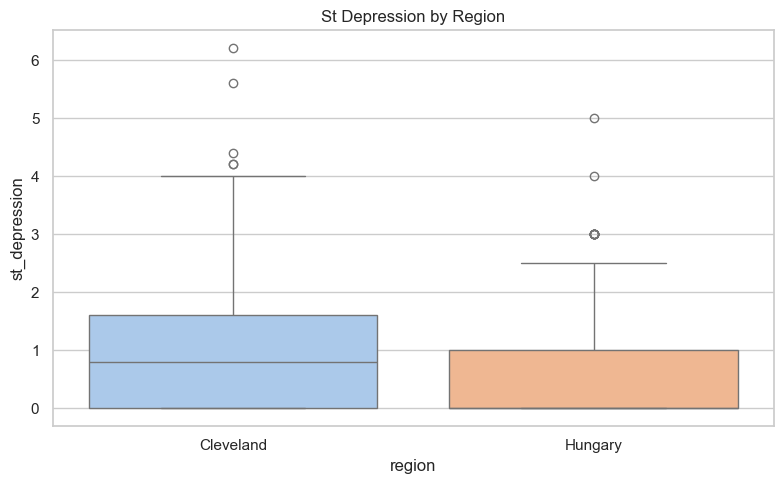

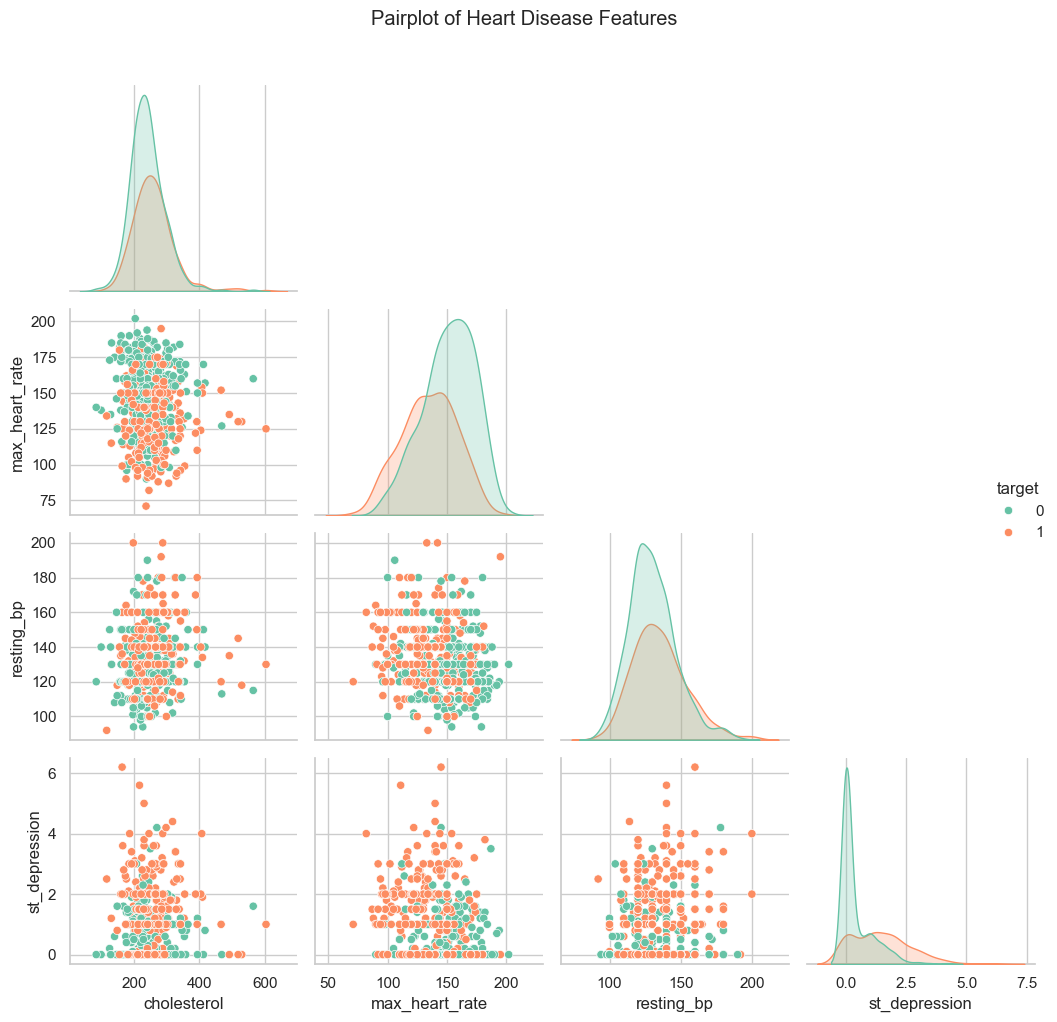


Average Feature Values by Region and Heart Disease Presence:

                  cholesterol  max_heart_rate  resting_bp  st_depression   age
region    target                                                              
Cleveland 0             242.6           158.4       129.2            0.6  52.6
          1             251.5           139.3       134.6            1.6  56.6
Hungary   0             239.8           145.0       130.7            0.2  46.9
          1             267.6           128.7       135.8            1.3  49.4


In [39]:
# Feature relationships with target
print("\nFeature Relationships with Target:")

# Boxplots by region
features_to_compare = ['cholesterol', 'max_heart_rate', 'resting_bp', 'st_depression']
for feature in features_to_compare:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='region', y=feature, data=df, hue='region', palette='pastel', legend=False)
    plt.title(f'{feature.replace("_", " ").title()} by Region')
    plt.tight_layout()
    plt.show()

# Pairplot
pairplot_features = ['cholesterol', 'max_heart_rate', 'resting_bp', 'st_depression', 'target']
sns.pairplot(df[pairplot_features], hue='target', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Heart Disease Features', y=1.02)
plt.tight_layout()
plt.show()

# Grouped statistics
grouped = df.groupby(['region', 'target']).agg({
    'cholesterol': 'mean',
    'max_heart_rate': 'mean',
    'resting_bp': 'mean',
    'st_depression': 'mean',
    'age': 'mean'
}).round(1)
print("\nAverage Feature Values by Region and Heart Disease Presence:\n")
print(grouped)

## 8. Statistical Testing

In [42]:
# T-tests for continuous variables
features_to_test = ['age', 'cholesterol', 'max_heart_rate']

print("T-Test: Comparison by Region (Cleveland vs. Hungary):\n")
for feature in features_to_test:
    group1 = df[df['region'] == 'Cleveland'][feature]
    group2 = df[df['region'] == 'Hungary'][feature]
    stat, p = ttest_ind(group1, group2, nan_policy='omit')
    print(f"{feature}:\n  t-statistic = {stat:.3f}, p-value = {p:.4f}")
    print("  → Statistically significant difference\n" if p < 0.05 else "  → No significant difference\n")

print("\nT-Test: Comparison by Heart Disease Presence:\n")
for feature in features_to_test:
    group1 = df[df['target'] == 0][feature]
    group2 = df[df['target'] == 1][feature]
    stat, p = ttest_ind(group1, group2, nan_policy='omit')
    print(f"{feature}:\n  t-statistic = {stat:.3f}, p-value = {p:.4f}")
    print("  → Statistically significant difference\n" if p < 0.05 else "  → No significant difference\n")

# Chi-square tests for categorical variables
print("\nChi-Square Test: Categorical Feature vs. Region\n")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['region'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}:\n  Chi2 = {chi2:.3f}, p-value = {p:.4f}")
    print("  → Significant difference\n" if p < 0.05 else "  → No significant difference\n")

print("\nChi-Square Test: Categorical Feature vs. Heart Disease Presence\n")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}:\n  Chi2 = {chi2:.3f}, p-value = {p:.4f}")
    print("  → Significant association\n" if p < 0.05 else "  → No significant association\n")

T-Test: Comparison by Region (Cleveland vs. Hungary):

age:
  t-statistic = 9.561, p-value = 0.0000
  → Statistically significant difference

cholesterol:
  t-statistic = -0.647, p-value = 0.5181
  → No significant difference

max_heart_rate:
  t-statistic = 5.490, p-value = 0.0000
  → Statistically significant difference


T-Test: Comparison by Heart Disease Presence:

age:
  t-statistic = -5.375, p-value = 0.0000
  → Statistically significant difference

cholesterol:
  t-statistic = -3.577, p-value = 0.0004
  → Statistically significant difference

max_heart_rate:
  t-statistic = 8.861, p-value = 0.0000
  → Statistically significant difference


Chi-Square Test: Categorical Feature vs. Region

sex:
  Chi2 = 1.303, p-value = 0.2536
  → No significant difference

chest_pain_type:
  Chi2 = 33.411, p-value = 0.0000
  → Significant difference

fasting_blood_sugar:
  Chi2 = 8.980, p-value = 0.0027
  → Significant difference

rest_ecg:
  Chi2 = 189.240, p-value = 0.0000
  → Significant diff